In [1]:
import openai
import os

In [2]:
openai.api_key = os.getenv("OPENAI_API_KEY")

Prompt Templates

In [3]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate
import langchain

c:\Users\user\anaconda3\envs\llm2\Lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.1.12) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [4]:
langchain.verbose=False
langchain.debug=False
langchain.llm_cache=False

In [8]:
chat = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)

In [9]:
template = "You are an assistant that help users find informations"

system_message_prompt = SystemMessagePromptTemplate.from_template(template)
human_template =  "Find information about the movie {movie_title}"
human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)

chat_prompt =  ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])

response = chat(chat_prompt.format_prompt(movie_title="Avengers Endgame").to_messages())

print(response.content)

"Avengers: Endgame" is a superhero film released in 2019, directed by Anthony and Joe Russo. It is the fourth Avengers film and serves as a direct sequel to "Avengers: Infinity War" (2018). The movie is part of the Marvel Cinematic Universe (MCU) and is based on the Marvel Comics superhero team the Avengers.

### Plot Summary
The film follows the aftermath of "Infinity War," where the villain Thanos has successfully wiped out half of all life in the universe using the Infinity Stones. The remaining Avengers and their allies are left to grapple with their loss and seek a way to reverse Thanos's actions. They devise a plan to travel back in time to collect the Infinity Stones from different points in the past, hoping to use them to restore the lives lost.

### Main Cast
- **Robert Downey Jr.** as Tony Stark / Iron Man
- **Chris Evans** as Steve Rogers / Captain America
- **Mark Ruffalo** as Bruce Banner / Hulk
- **Chris Hemsworth** as Thor
- **Scarlett Johansson** as Natasha Romanoff / B

Summarization Chain Example

In [10]:
# import necessary modules
from langchain.chat_models import ChatOpenAI
from langchain import PromptTemplate
from langchain.chains.summarize import load_summarize_chain
from langchain.document_loaders import PyPDFLoader

In [12]:
# Initialize language model
llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)

# load the summarization chain
summarization_chain = load_summarize_chain(llm)

# load the document by using PyPDFLoader
document_loader = PyPDFLoader(file_path="Sani Jacob Itopa Personal Statement.pdf")
document =  document_loader.load()

# summarize the document
summary =  summarization_chain(document)
print(summary["output_text"])

The author, driven by a fascination with transforming raw materials into community-serving structures, pursued a degree in civil engineering. During an internship at Lepton Multiconcept, they faced challenges in traffic flow optimization, realizing traditional methods were inadequate. This prompted them to learn programming and explore AI's potential in civil engineering, particularly for traffic analysis and city planning. After completing their undergraduate studies, they worked at Tamela, applying AI to healthcare by developing models for ultrasound analysis. They now seek to further their knowledge through a Master’s program in Artificial Intelligence at Anglia Ruskin University, aiming to innovate AI applications in transportation, education, and healthcare.


QA Chain Example

In [13]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.chat_models import ChatOpenAI

In [14]:
prompt = PromptTemplate(template="Question: {question}\nAnswer:", input_variables=["question"])

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)
chain = LLMChain(llm=llm, prompt=prompt)

In [15]:
chain.run("What is the meaning of life?")

'The meaning of life is a deeply philosophical question that has been debated by thinkers, philosophers, and theologians for centuries. Different people and cultures have different beliefs about the purpose and meaning of life. Some believe that the meaning of life is to seek happiness and fulfillment, others believe it is to serve a higher power or fulfill a specific destiny, while others believe that life has no inherent meaning and it is up to each individual to create their own purpose. Ultimately, the meaning of life is a deeply personal and subjective question that each person must grapple with and find their own answer to.'

Building a News Articles Summarizer

Workflow

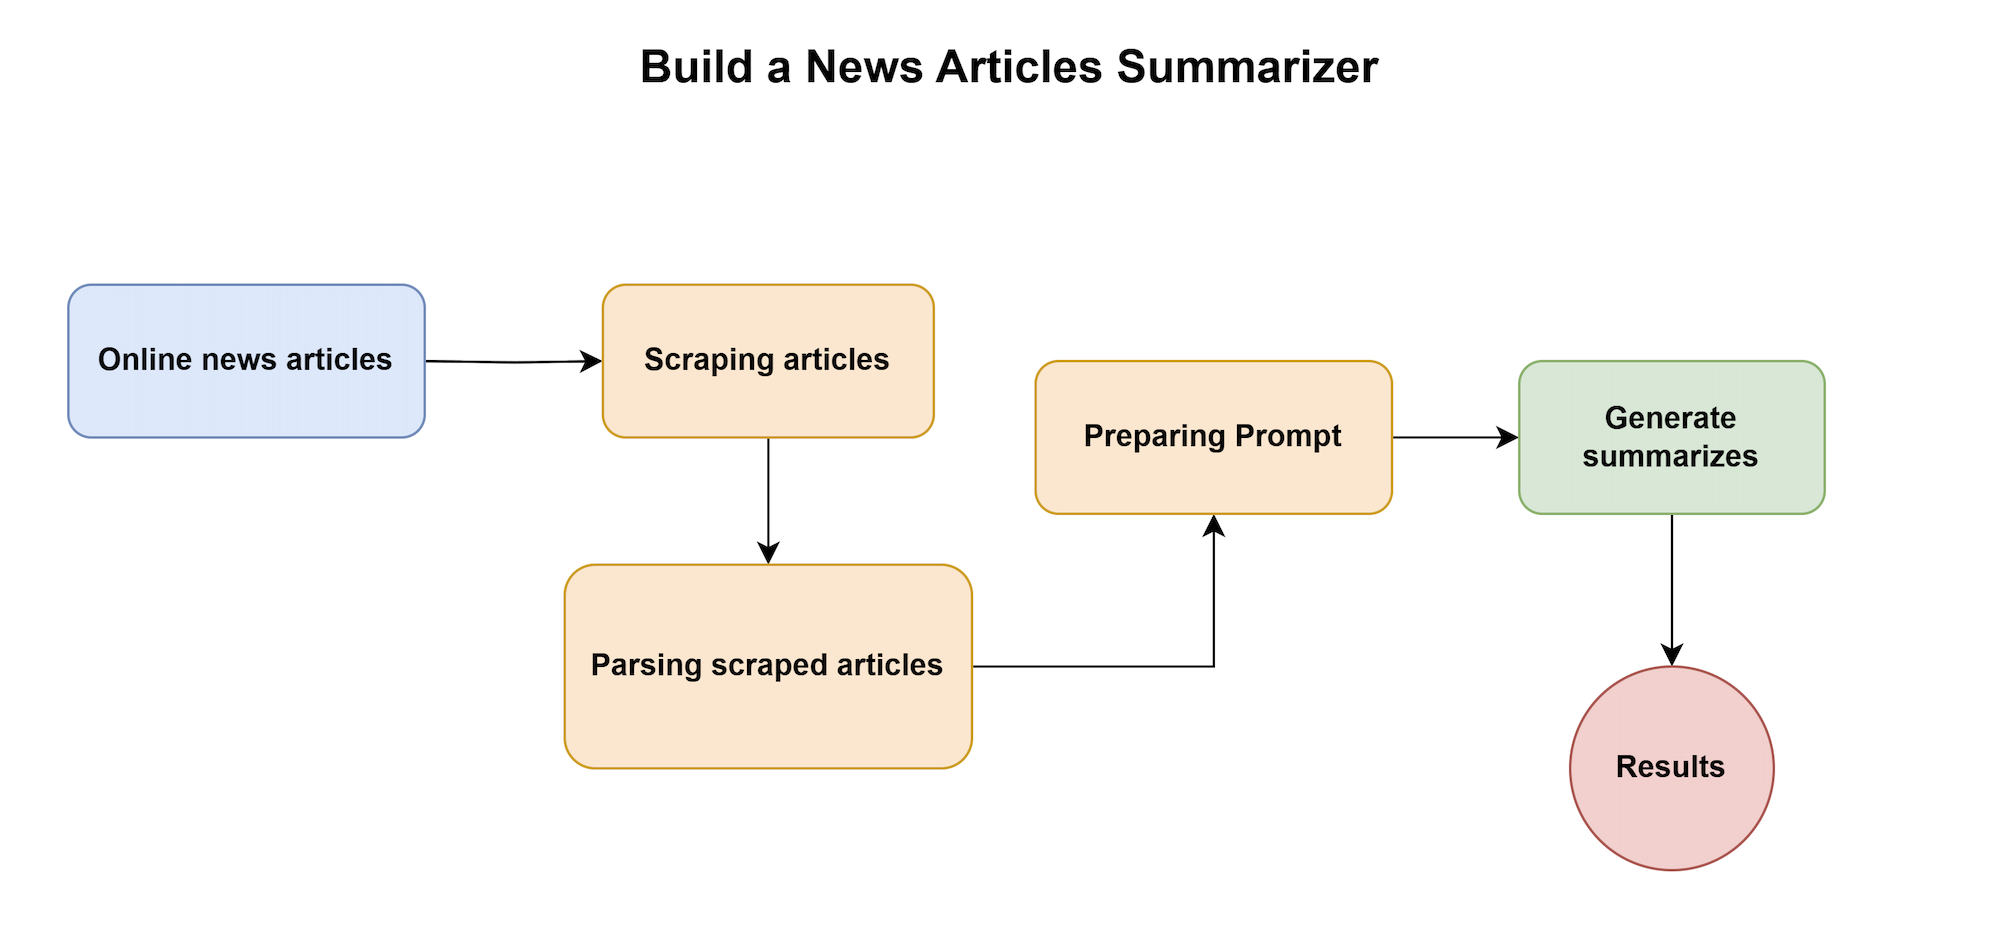

1. Scraping articles

In [5]:
import requests
from newspaper import Article

In [6]:
headers = {
    "User-Agent": '''Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82Safari/537.36'''
}

article_url = """https://www.bbc.com/news/topics/ce1qrvleleqt"""

session = requests.Session()

try:
    response=session.get(article_url, headers=headers, timeout=10)
    if response.status_code == 200:
        article = Article(article_url)
        article.download()
        article.parse()
        print(f'Title: {article.title}')
        print(f'Text: {article.text}')
    else:
        print(f'failed to fetch article at {article_url}')
except Exception as e:
    print(f'Error occured while fetching aticle at {article_url}: {e}')
    



Title: Artificial intelligence
Text: BBC Verify: Viral Donald Trump Jr audio highly likely AI fake

A clip of Donald Trump Jr allegedly saying on his podcast that the US should have sent arms to Russia rather than Ukraine was very likely generated with AI, experts say.


In [7]:
from langchain.schema import HumanMessage

# we get the article data from the scraping part
article_title = article.title
article_text =  article.text

# prepare template for prompt
template = """You are a very good assistant that summarizes online articles.

Here is the article you want to summarize

========================
Title: {article_title}

{article_text}
========================

Write a summary of the pevious article."""

prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

In [10]:
from langchain.chat_models import ChatOpenAI

# load the model
chat = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)

In [11]:
# generate summary
summary = chat(messages)
print(summary.content)

The article discusses a viral audio clip of Donald Trump Jr. in which he supposedly claims that the US should have sent arms to Russia instead of Ukraine. Experts from BBC Verify have indicated that this clip is highly likely to be an AI-generated fake.


In [12]:
#from langchain.schema import HumanMessage
article_title = article.title
article_text = article.text

template = """You are a very good assistant that summarizes online articles.

Here is the article you want to summaize.

=======================
Title: {article_title}

{article_text}
=======================

Provide a summarized version of the article in a bulleted list format
"""

prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

In [13]:
# from langcahin.chat_models import ChatOpenAI

chat = ChatOpenAI(model_name='gpt-4o-mini', temperature=0)

In [14]:
summary = chat(messages)
print(summary.content)

- A viral audio clip featuring Donald Trump Jr. discussing U.S. arms support is likely an AI-generated fake.
- The clip suggests that Trump Jr. advocated for sending arms to Russia instead of Ukraine.
- Experts have analyzed the audio and concluded it is highly probable that it was created using artificial intelligence.
